In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
from scipy.optimize import curve_fit
from scipy.stats import probplot,shapiro
import os

In [2]:
chain_lengths=[25,50,75,100,125,150]
folders=[]
for i in chain_lengths:
    folders.append('../chain_length_'+str(i)+'/varying_epas_chain_length_'+str(i)+'_master_out.csv')
j=0
for file in folders:
    if j==0:
        chain_rg_ree=pd.read_csv(file)
        chain_rg_ree['Rend2']=chain_rg_ree.Rendx+chain_rg_ree.Rendy+chain_rg_ree.Rendz
        chain_rg_ree['Rg2']=chain_rg_ree.Rgx+chain_rg_ree.Rgy+chain_rg_ree.Rgz
        chain_rg_ree['ratio']=chain_rg_ree.Rend2.values/chain_rg_ree.Rg2.values
        chain_rg_ree['asphericity']=chain_rg_ree.Rgx.values-(0.5*(chain_rg_ree.Rgy.values+chain_rg_ree.Rgz.values))
        chain_rg_ree['acylindricity']=chain_rg_ree.Rgy.values-chain_rg_ree.Rgz.values
        chain_rg_ree['RSA']=((chain_rg_ree.asphericity.values**2+(0.75*chain_rg_ree.acylindricity.values**2))/(chain_rg_ree.Rg2.values)**2)**0.5
        running_df=chain_rg_ree.copy()
    else:
        chain_rg_ree=pd.read_csv(file)
        chain_rg_ree['Rend2']=chain_rg_ree.Rendx+chain_rg_ree.Rendy+chain_rg_ree.Rendz
        chain_rg_ree['Rg2']=chain_rg_ree.Rgx+chain_rg_ree.Rgy+chain_rg_ree.Rgz
        chain_rg_ree['ratio']=chain_rg_ree.Rend2.values/chain_rg_ree.Rg2.values
        chain_rg_ree['asphericity']=chain_rg_ree.Rgx.values-(0.5*(chain_rg_ree.Rgy.values+chain_rg_ree.Rgz.values))
        chain_rg_ree['acylindricity']=chain_rg_ree.Rgy.values-chain_rg_ree.Rgz.values
        chain_rg_ree['RSA']=((chain_rg_ree.asphericity.values**2+(0.75*chain_rg_ree.acylindricity.values**2))/(chain_rg_ree.Rg2.values)**2)**0.5
        running_df=running_df.append(chain_rg_ree.copy())
    j+=1  

#     epas_considered = chain_rg_ree.epas.unique()
#     blank_df = pd.DataFrame()
#     for epas in chain_rg_ree.epas.unique():
#         if epas in epas_considered:
#             frames_number=len(chain_rg_ree[chain_rg_ree.epas==epas].index)
#             equil_frames=int(0.90*frames_number)
#             temp_df = chain_rg_ree[chain_rg_ree.epas==epas].iloc[-equil_frames:,:]
#             blank_df = blank_df.append(temp_df)
#     equil_chain_rg_ree=blank_df.copy()



# set epas for notebook

In [3]:
chain_rg_ree=running_df[running_df.epas==0.35]

# continue

In [4]:
def cum_mean(arr):
    cum_sum = np.cumsum(arr, axis=0)    
    for i in range(cum_sum.shape[0]):       
        if i == 0:
            continue        
        cum_sum[i] =  cum_sum[i] / (i + 1)
    return cum_sum


In [5]:
def running_mse(arr):
    mse=[]
    for i in range(arr.shape[0]):
        if i==0:
            difference_array = np.subtract(arr[i+1], arr[0])
            squared_array = np.square(difference_array)
            mse.append(squared_array.mean())            
        else:
            difference_array = np.subtract(arr[i], arr[i-1])
            squared_array = np.square(difference_array)
            mse.append(squared_array.mean())
    return mse    

In [6]:
#measure lsx/Rg = 1.5Rg
#change to random walk, by something to do with beads

# check what the data look like. make sure the frames are equilibrated

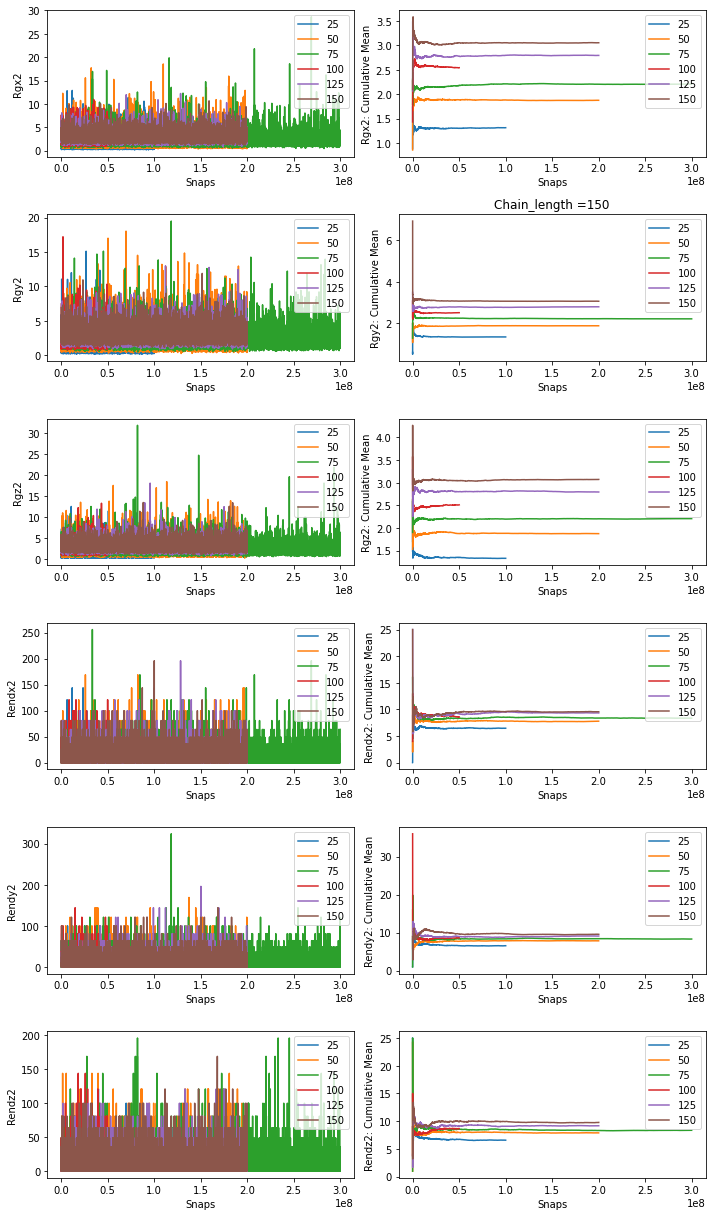

In [7]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(10,17))

for chain_length in chain_rg_ree.chain_length.unique():
    ax[0,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgx.values,label=str(chain_length))
    
    ax[0,0].set_ylabel('Rgx2')
    ax[0,0].set_xlabel('Snaps')
    ax[0,0].legend()
    ax[0,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgx.values),label=str(chain_length))
    ax[0,1].set_xlabel('Snaps')
    ax[0,1].set_ylabel('Rgx2: Cumulative Mean')

    ax[0,1].legend()
    ax[1,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgy.values,label=str(chain_length))

    ax[1,0].set_ylabel('Rgy2')
    ax[1,0].set_xlabel('Snaps')
    ax[1,0].legend()    
    ax[1,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgy.values),label=str(chain_length))
    ax[1,1].set_xlabel('Snaps')
    ax[1,1].set_ylabel('Rgy2: Cumulative Mean')
    ax[1,1].legend()    
    ax[1,1].set_title('Chain_length ='+str(chain_length))

    ax[2,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgz.values,label=str(chain_length))
 
    ax[2,0].set_ylabel('Rgz2')
    ax[2,0].set_xlabel('Snaps')
    ax[2,0].legend()    
    ax[2,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgz.values),label=str(chain_length))
    ax[2,1].set_xlabel('Snaps')
    ax[2,1].set_ylabel('Rgz2: Cumulative Mean')
   
    ax[2,1].legend()
    ax[3,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendx.values,label=str(chain_length))
 
    ax[3,0].set_ylabel('Rendx2')
    ax[3,0].set_xlabel('Snaps')
    ax[3,0].legend()    
    ax[3,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendx.values),label=str(chain_length))
    ax[3,1].set_xlabel('Snaps')
    ax[3,1].set_ylabel('Rendx2: Cumulative Mean')
 
    ax[3,1].legend()

    ax[4,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendy.values,label=str(chain_length))
 
    ax[4,0].set_ylabel('Rendy2')
    ax[4,0].set_xlabel('Snaps')
    ax[4,0].legend()    
    ax[4,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendy.values),label=str(chain_length))
    ax[4,1].set_xlabel('Snaps')
    ax[4,1].set_ylabel('Rendy2: Cumulative Mean')
 
    ax[4,1].legend()

    ax[5,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendz.values,label=str(chain_length))
 
    ax[5,0].set_ylabel('Rendz2')
    ax[5,0].set_xlabel('Snaps')
    ax[5,0].legend()    
    ax[5,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendz.values),label=str(chain_length))
    ax[5,1].set_xlabel('Snaps')
    ax[5,1].set_ylabel('Rendz2: Cumulative Mean')

    ax[5,1].legend()    
plt.tight_layout()

In [8]:
chain_rg_ree

,frames,epas,chain_length,econf,Rgx,Rgy,Rgz,Rendx,Rendy,Rendz,Rend2,Rg2,ratio,asphericity,acylindricity,RSA
80080,10000,0.35,25,-46.9,0.880000,0.582400,1.702400,0.0,1.0,25.0,26.0,3.164800,8.215369,-0.262400,-1.120000,0.317497
80081,20000,0.35,25,-114.8,1.785600,0.409600,3.494400,0.0,1.0,25.0,26.0,5.689600,4.569741,-0.166400,-3.084800,0.470454
80082,30000,0.35,25,-205.8,1.062400,1.097600,0.889600,1.0,1.0,4.0,6.0,3.049600,1.967471,0.068800,0.208000,0.063230
80083,40000,0.35,25,-281.4,3.273600,2.742400,0.294400,25.0,16.0,1.0,42.0,6.310400,6.655680,1.755200,2.448000,0.436156
80084,50000,0.35,25,-381.5,0.950400,3.721600,1.049600,4.0,16.0,4.0,24.0,5.721600,4.194631,-1.435200,2.672000,0.475908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90085,200120000,0.35,150,111.3,1.890000,4.801289,2.465822,1.0,25.0,1.0,27.0,9.157111,2.948528,-1.743556,2.335467,0.291615
90086,200140000,0.35,150,105.7,3.062222,1.873822,3.660622,9.0,1.0,9.0,19.0,8.596667,2.210159,0.295000,-1.786800,0.183243
90087,200160000,0.35,150,101.5,2.488889,4.864400,1.755556,1.0,25.0,9.0,35.0,9.108844,3.842419,-0.821089,3.108844,0.309014
90088,200180000,0.35,150,109.2,4.004489,2.497600,3.721956,4.0,9.0,4.0,17.0,10.224044,1.662747,0.894711,-1.224356,0.135697


In [9]:
# make sure to manually add ONLY the relevant/working chain length from chain_rg_ree in this below chain length list
chain_lengths_considered = chain_lengths
blank_df = pd.DataFrame()
for chain_length in chain_rg_ree.chain_length.unique():
    if chain_length in chain_lengths_considered:
        frames_number=len(chain_rg_ree[chain_rg_ree.chain_length==chain_length].index)
        equil_frames=int(0.90*frames_number)
        temp_df = chain_rg_ree[chain_rg_ree.chain_length==chain_length].iloc[-equil_frames:,:]
        blank_df = blank_df.append(temp_df)
equil_chain_rg_ree=blank_df.copy()
del blank_df, temp_df

In [10]:
equil_chain_rg_ree

,frames,epas,chain_length,econf,Rgx,Rgy,Rgz,Rendx,Rendy,Rendz,Rend2,Rg2,ratio,asphericity,acylindricity,RSA
81081,10020000,0.35,25,-86357.6,2.000000,2.080000,0.566400,16.0,0.0,0.0,16.0,4.646400,3.443526,0.676800,1.513600,0.317499
81082,10030000,0.35,25,-86461.2,2.345600,2.240000,0.726400,9.0,16.0,1.0,26.0,5.312000,4.894578,0.862400,1.513600,0.295382
81083,10040000,0.35,25,-86540.3,0.713600,0.710400,1.280000,4.0,1.0,9.0,14.0,2.704000,5.177515,-0.281600,-0.569600,0.210062
81084,10050000,0.35,25,-86611.7,1.001600,3.280000,0.534400,1.0,36.0,1.0,38.0,4.816000,7.890365,-0.905600,2.745600,0.528317
81085,10060000,0.35,25,-86701.3,0.454400,2.310400,1.680000,0.0,25.0,25.0,50.0,4.444800,11.249100,-1.540800,0.630400,0.367769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90085,200120000,0.35,150,111.3,1.890000,4.801289,2.465822,1.0,25.0,1.0,27.0,9.157111,2.948528,-1.743556,2.335467,0.291615
90086,200140000,0.35,150,105.7,3.062222,1.873822,3.660622,9.0,1.0,9.0,19.0,8.596667,2.210159,0.295000,-1.786800,0.183243
90087,200160000,0.35,150,101.5,2.488889,4.864400,1.755556,1.0,25.0,9.0,35.0,9.108844,3.842419,-0.821089,3.108844,0.309014
90088,200180000,0.35,150,109.2,4.004489,2.497600,3.721956,4.0,9.0,4.0,17.0,10.224044,1.662747,0.894711,-1.224356,0.135697


/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


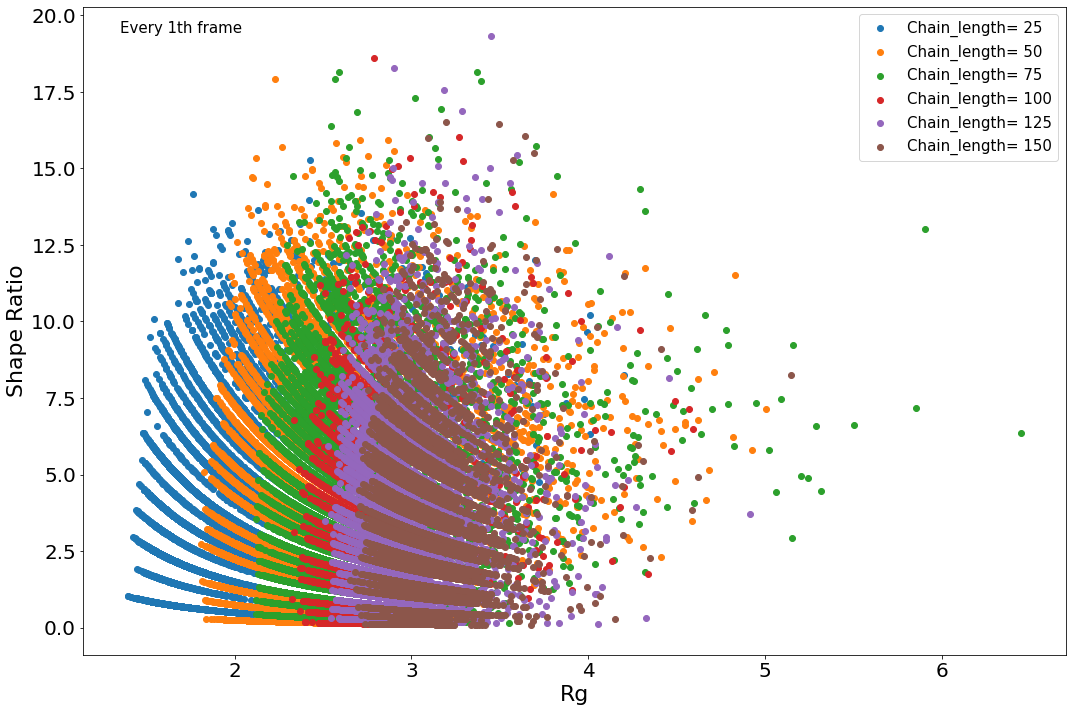

In [11]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    ax.scatter((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values)**0.5,
               equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
            label='Chain_length= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Rg',fontsize=22)
ax.set_ylabel('Shape Ratio',fontsize=22)
ax.text(0.1,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
#plt.set_title('')
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


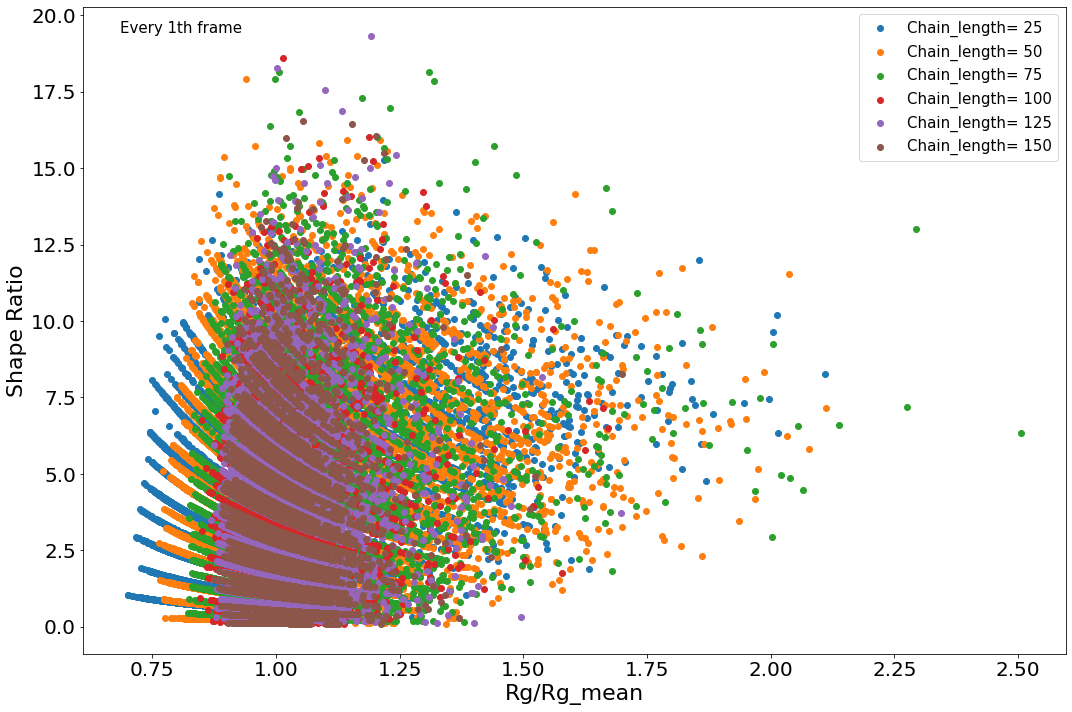

In [12]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    ax.scatter((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values)**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values.mean())**0.5,
               equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
            label='Chain_length= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Rg/Rg_mean',fontsize=22)
ax.set_ylabel('Shape Ratio',fontsize=22)
ax.text(0.1,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
#plt.set_title('')
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # This is added back by InteractiveShellApp.init_path()


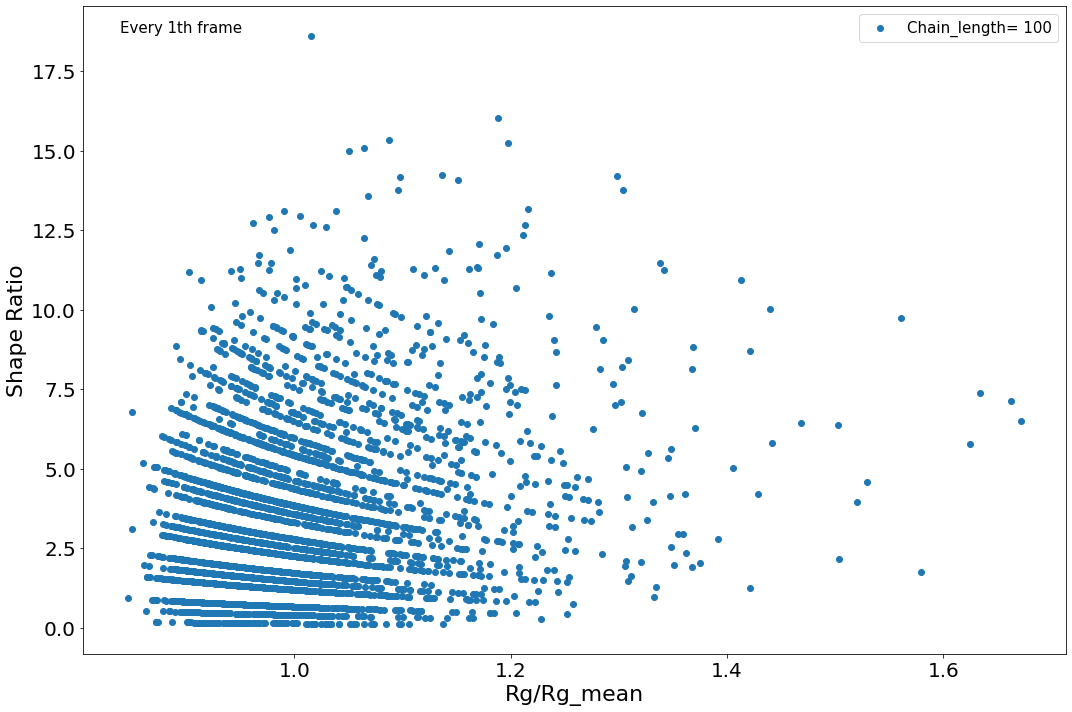

In [13]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    if i==100:
        ax.scatter((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values)**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values.mean())**0.5,
                   equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
                label='Chain_length= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Rg/Rg_mean',fontsize=22)
ax.set_ylabel('Shape Ratio',fontsize=22)
ax.text(0.1,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
#plt.set_title('')
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


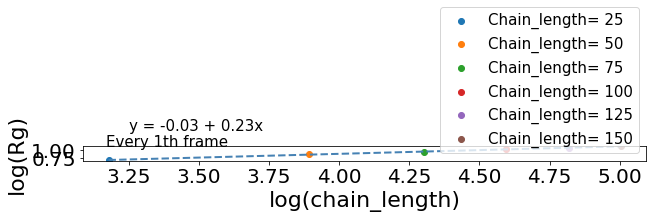

In [14]:
#use i-1 because there are i-1 bonds
fig,ax = plt.subplots(figsize=(9,6))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    ax.scatter(np.log(i-1),np.log((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values.mean())**0.5),
            label='Chain_length= '+str(i))
ax.legend(fontsize=15,loc='lower right')
ax.set_xlabel('log(chain_length)',fontsize=22)
ax.set_ylabel('log(Rg)',fontsize=22)
x=np.array([np.log(i-1) for i in equil_chain_rg_ree.chain_length.unique()])
y=np.array([np.log((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values.mean())**0.5) for i in equil_chain_rg_ree.chain_length.unique()])
a, b = np.polyfit(x, y, 1)
ax.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)
ax.text(0.15,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
#plt.set_title('')
ax.text(3.25, 1.6, 'y = ' + '{:.02f}'.format(b) + ' + {:.02f}'.format(a) + 'x', size=14,fontsize=15)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()


In [15]:
equil_chain_rg_ree.ratio.mean

<bound method Series.mean of 81081     3.443526
81082     4.894578
81083     5.177515
81084     7.890365
81085    11.249100
           ...    
90085     2.948528
90086     2.210159
90087     3.842419
90088     1.662747
90089     2.876598
Name: ratio, Length: 67554, dtype: float64>

In [16]:
np.log(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==25].Rg2.values.mean())

1.3779864414545204

mean=  0.3191135928993092 for run =  25 std=  0.15856151496031595 error =  0.0016705500554249051
mean=  0.26573729416552516 for run =  50 std=  0.1385507972826083 error =  0.0010324385928097912
mean=  0.23173990206310688 for run =  75 std=  0.12226243780370913 error =  0.000911062669542653
mean=  0.211532098789858 for run =  100 std=  0.10945013675962074 error =  0.0016299571632757482
mean=  0.19774341201087373 for run =  125 std=  0.1047639009791695 error =  0.001103756738393187
mean=  0.18345857452246023 for run =  150 std=  0.09564045963439315 error =  0.0010076352712894167


/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if sys.path[0] == '':


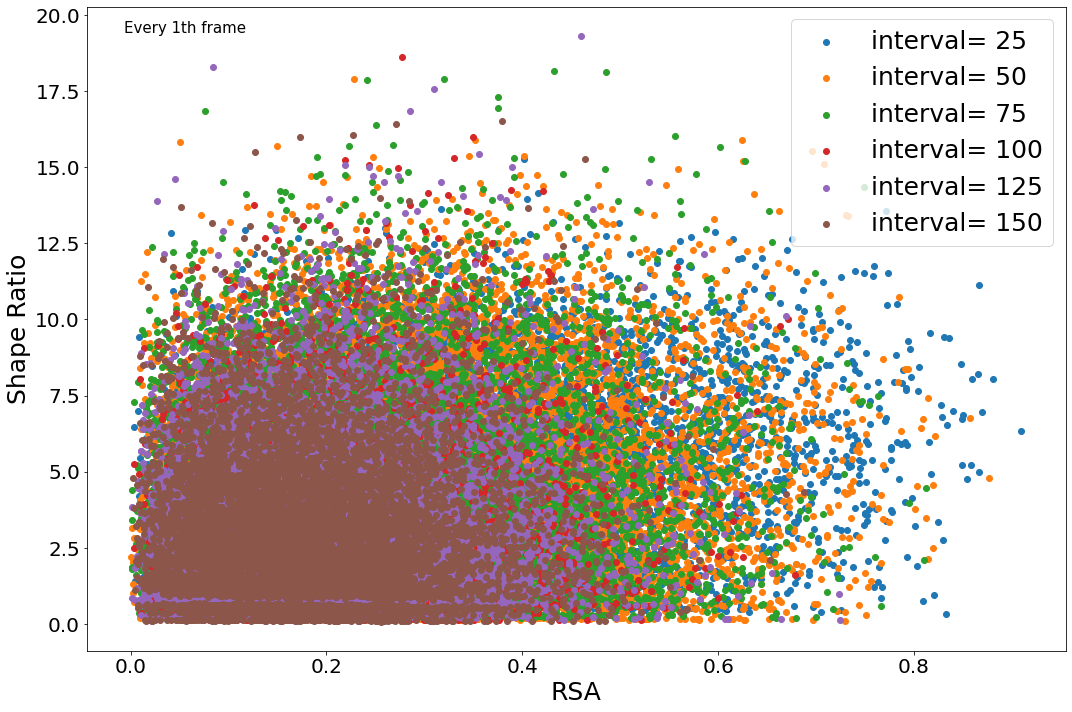

In [17]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    ax.scatter(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].RSA.values,equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
            label='interval= '+str(i))
    print('mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].RSA.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].RSA.std(),'error = ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].RSA.std()/len(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].frames)**0.5)
ax.legend(fontsize=25,loc='upper right')
ax.set_xlabel('RSA',fontsize=25)
ax.set_ylabel('Shape Ratio',fontsize=25)
#ax.set_ylim(0,15)
#ax.set_xlim(0,1)
ax.text(0.1,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()


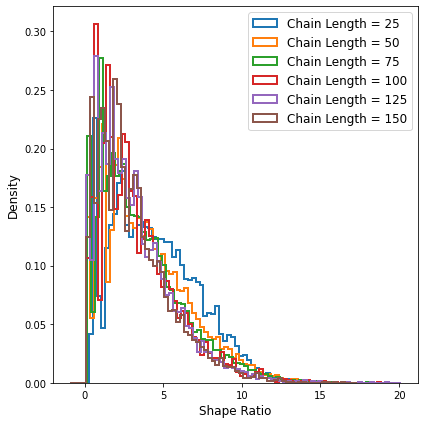

In [18]:
fig = plt.subplots(figsize=(6,6))
for chain_length in equil_chain_rg_ree.chain_length.unique():
    n,bins,patches=plt.hist(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].ratio.values,
             label='Chain Length = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,bins=np.arange(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].ratio.values.min()-1,
                                        equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].ratio.values.max()+1,0.25),
    linewidth=2)
plt.legend(fontsize=12)
#plt.title('Ratio distribution',fontsize=25)
plt.xlabel("Shape Ratio",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


In [19]:
for chain_length in equil_chain_rg_ree.chain_length.unique():
    print('The mean shape ratio for chain length ',str(chain_length),' is',
          format(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].ratio.values.mean(),'0.2f'),
         'with standard deviation ',
          format(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].ratio.values.std(),'0.2f'))
    

The mean shape ratio for chain length  25  is 4.52 with standard deviation  2.64
The mean shape ratio for chain length  50  is 3.94 with standard deviation  2.70
The mean shape ratio for chain length  75  is 3.63 with standard deviation  2.61
The mean shape ratio for chain length  100  is 3.35 with standard deviation  2.46
The mean shape ratio for chain length  125  is 3.26 with standard deviation  2.39
The mean shape ratio for chain length  150  is 3.11 with standard deviation  2.31


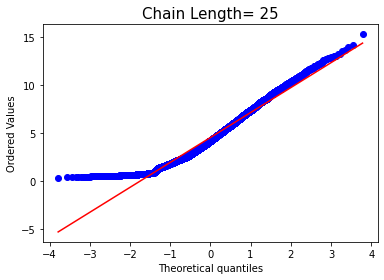

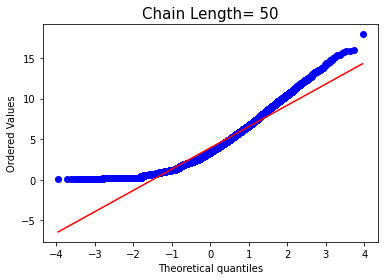

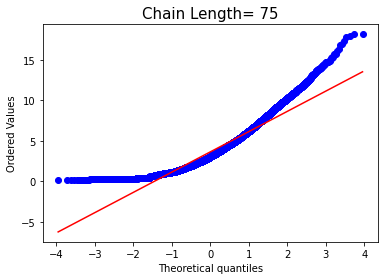

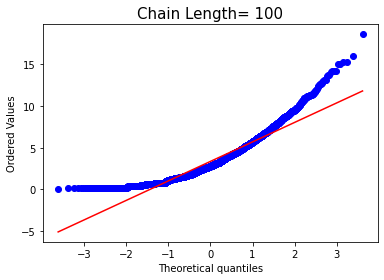

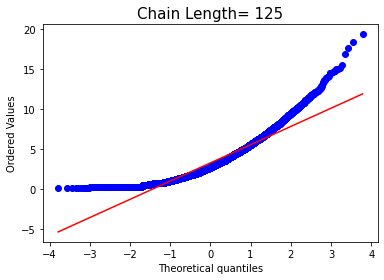

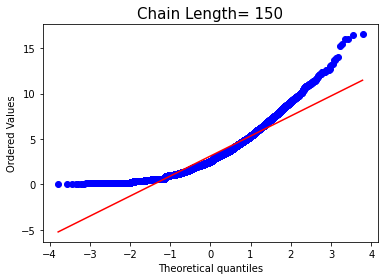

In [20]:
#Q-Q plot
#Shape Ratio
for i in equil_chain_rg_ree.chain_length.unique():
    probplot(x=equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].ratio,dist='norm',plot=plt)
    plt.title('Chain Length= '+str(i),fontsize=15)
    plt.show()


/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/too

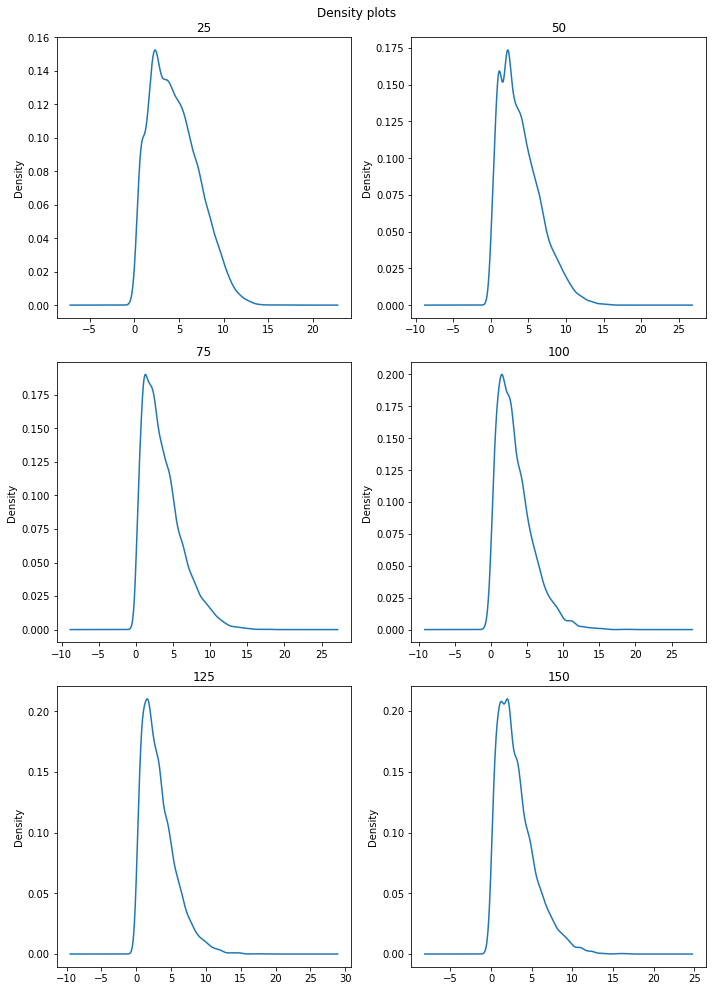

In [21]:
#Density plot
fig,ax = plt.subplots(3,2,figsize=(10,14))
row = col = 0
for n,c in enumerate(equil_chain_rg_ree.chain_length.unique()):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    equil_chain_rg_ree[equil_chain_rg_ree.chain_length==c].ratio.plot(kind="kde",ax=ax[row,col])
    ax[row,col].set_title(c)
    col += 1
plt.suptitle("Density plots")
plt.tight_layout()

In [22]:
for i in equil_chain_rg_ree.chain_length.unique():
    print(f'{i}: {"Not Gaussian" if shapiro(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].ratio)[1]<0.05 else "Gaussian"}  {shapiro(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].ratio)}')


25: Not Gaussian  ShapiroResult(statistic=0.9644875526428223, pvalue=2.865655359544251e-42)
50: Not Gaussian  ShapiroResult(statistic=0.9375053644180298, pvalue=0.0)
75: Not Gaussian  ShapiroResult(statistic=0.9157285094261169, pvalue=0.0)
100: Not Gaussian  ShapiroResult(statistic=0.908544659614563, pvalue=0.0)
125: Not Gaussian  ShapiroResult(statistic=0.9061007499694824, pvalue=0.0)
150: Not Gaussian  ShapiroResult(statistic=0.9084281921386719, pvalue=0.0)


/home/hshadman/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/hshadman/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/hshadman/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/hshadman/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/hshadman/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/hshadman/

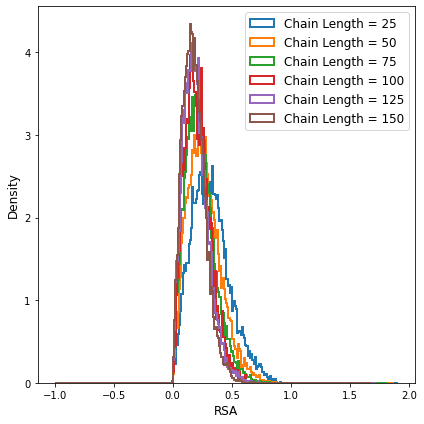

In [23]:
fig = plt.subplots(figsize=(6,6))
for chain_length in equil_chain_rg_ree.chain_length.unique():
    n,bins,patches=plt.hist(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].RSA.values,
             label='Chain Length = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,bins=np.arange(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].RSA.values.min()-1,
                                        equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].RSA.values.max()+1,0.01),
    linewidth=2)
plt.legend(fontsize=12)
#plt.title('RSA distribution',fontsize=25)
plt.xlabel("RSA",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


In [24]:
for chain_length in equil_chain_rg_ree.chain_length.unique():
    print('The mean RSA for chain length ',str(chain_length),' is',
          format(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].RSA.values.mean(),'0.2f'),
         'with standard deviation ',
          format(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].RSA.values.std(),'0.2f'))
    

The mean RSA for chain length  25  is 0.32 with standard deviation  0.16
The mean RSA for chain length  50  is 0.27 with standard deviation  0.14
The mean RSA for chain length  75  is 0.23 with standard deviation  0.12
The mean RSA for chain length  100  is 0.21 with standard deviation  0.11
The mean RSA for chain length  125  is 0.20 with standard deviation  0.10
The mean RSA for chain length  150  is 0.18 with standard deviation  0.10


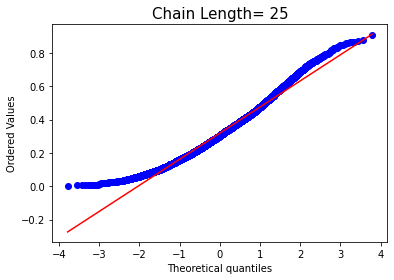

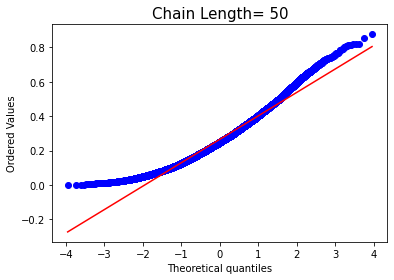

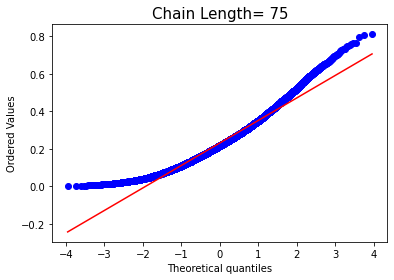

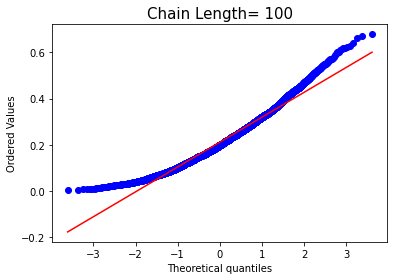

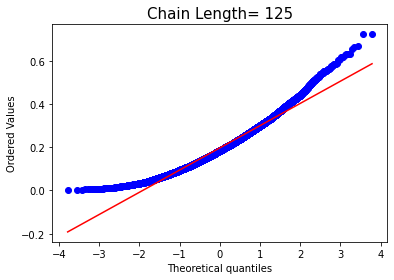

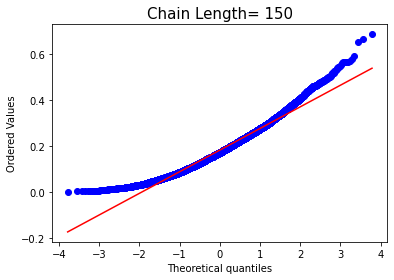

In [25]:
#Q-Q plot
#RSA
for i in equil_chain_rg_ree.chain_length.unique():
    probplot(x=equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].RSA,dist='norm',plot=plt)
    plt.title('Chain Length= '+str(i),fontsize=15)
    plt.show()


/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/too

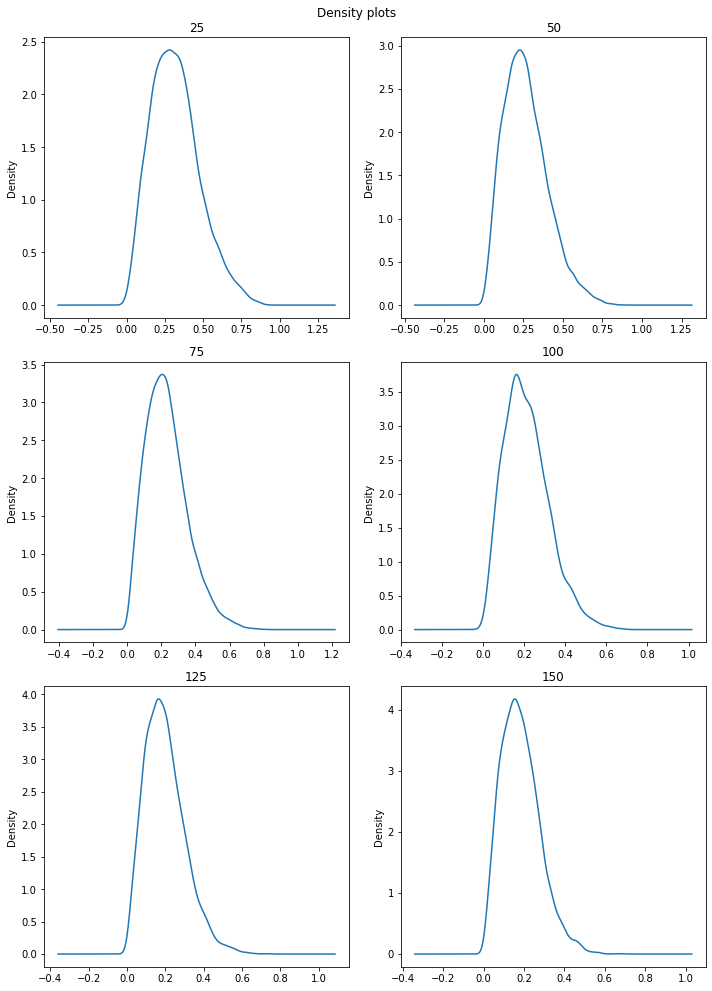

In [26]:
#Density plot
fig,ax = plt.subplots(3,2,figsize=(10,14))
row = col = 0
for n,c in enumerate(equil_chain_rg_ree.chain_length.unique()):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    equil_chain_rg_ree[equil_chain_rg_ree.chain_length==c].RSA.plot(kind="kde",ax=ax[row,col])
    ax[row,col].set_title(c)
    col += 1
plt.suptitle("Density plots")
plt.tight_layout()

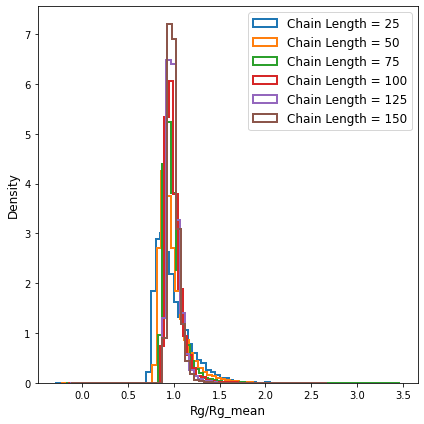

In [27]:
fig = plt.subplots(figsize=(6,6))
for chain_length in equil_chain_rg_ree.chain_length.unique():
    plt.hist(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values.mean())**0.5,
             label='Chain Length = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,linewidth=2,bins=np.arange(((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5)/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values.mean()**0.5)).min()-1,
                                        ((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5)/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values.mean()**0.5)).max()+1,0.05))
    
plt.legend(fontsize=12)
#plt.title('Ratio distribution',fontsize=25)
plt.xlabel("Rg/Rg_mean",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]


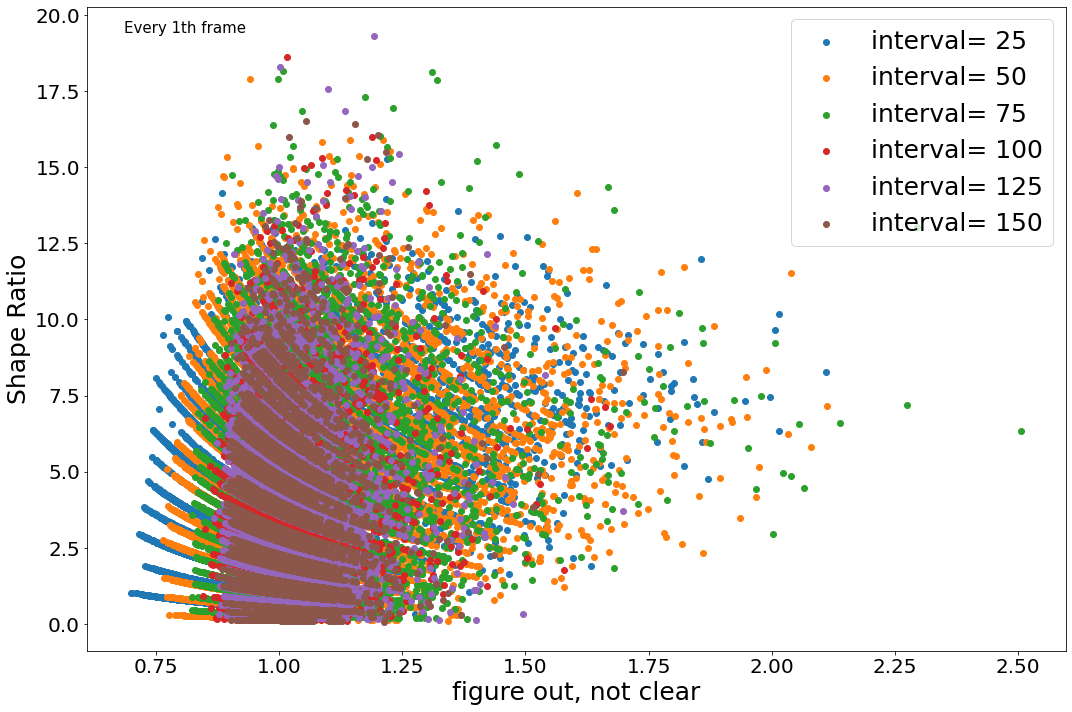

In [28]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    ax.scatter(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].Rg2.values**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].Rg2.values.mean())**0.5,
               equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
            label='interval= '+str(i))
#    print('mean Rg/Rg_mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values.mean())**0.5.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values.std())**0.5)
ax.legend(fontsize=25,loc='upper right')
ax.set_xlabel('figure out, not clear',fontsize=25)
ax.set_ylabel('Shape Ratio',fontsize=25)
#ax.set_ylim(0,15)
#ax.set_xlim(0,1)
ax.text(0.1,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()


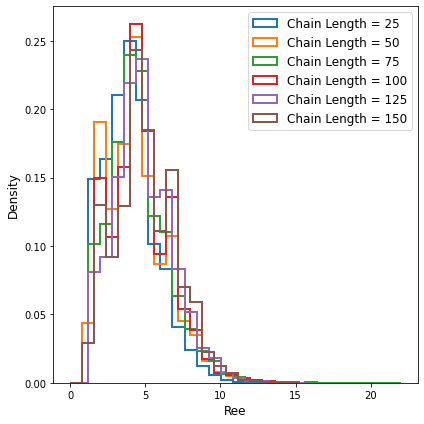

In [29]:
fig = plt.subplots(figsize=(6,6))
for chain_length in equil_chain_rg_ree.chain_length.unique():
    plt.hist(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rend2.values**0.5,
             label='Chain Length = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,bins=np.arange((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rend2.values**0.5).min()-1,
                                        (equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rend2.values**0.5).max()+1,0.8),
    linewidth=2)
plt.legend(fontsize=12)
#plt.title('Ratio distribution',fontsize=25)
plt.xlabel("Ree",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


# dont look beyond this line

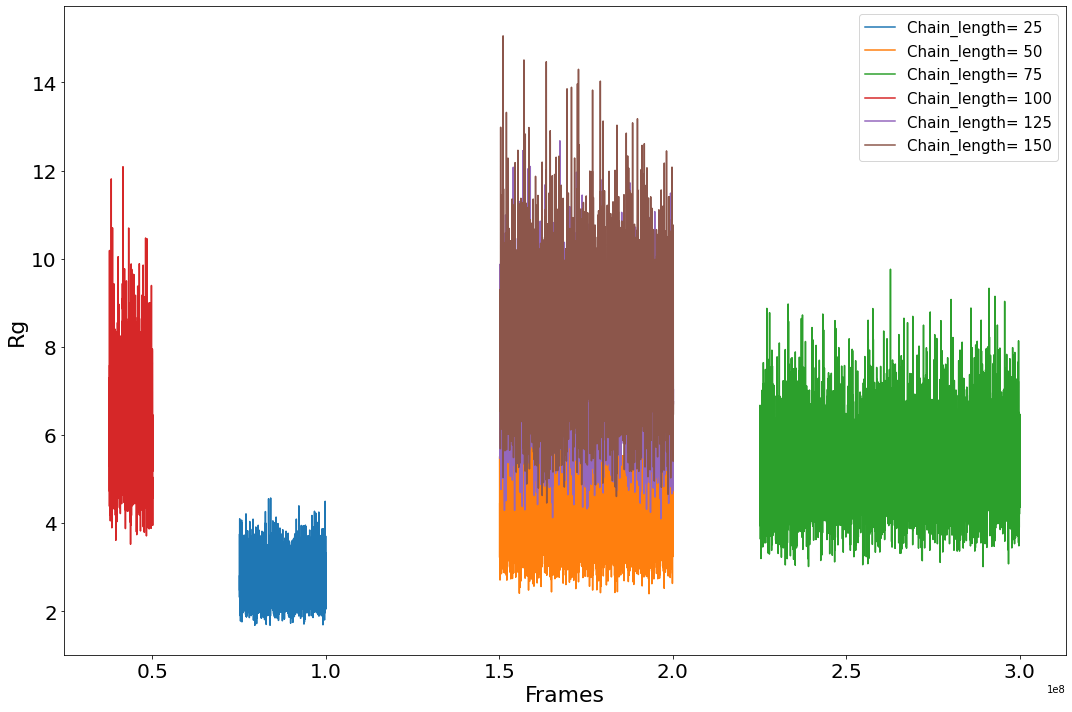

In [90]:
fig,ax = plt.subplots(figsize=(15,10))
for i in equil_chain_rg_ree.chain_length.unique():
    ax.plot(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].frames.values,(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].Rg2.values)**0.5,
            label='Chain_length= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Frames',fontsize=22)
ax.set_ylabel('Rg',fontsize=22)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

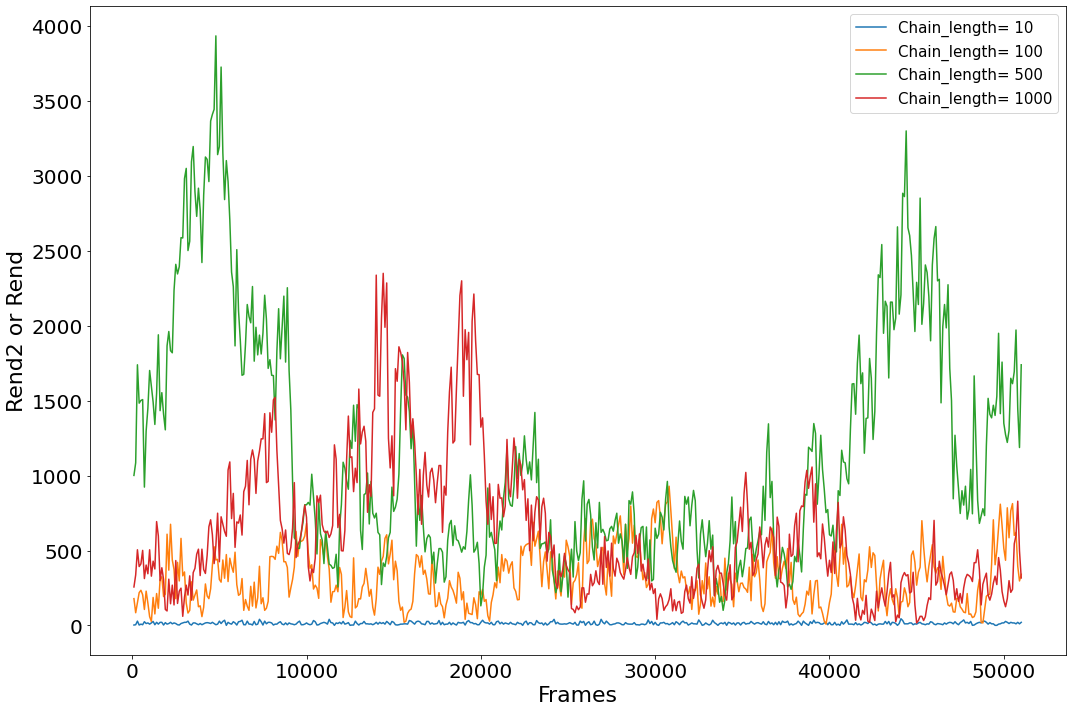

In [10]:
fig,ax = plt.subplots(figsize=(15,10))
for i in chain_rg_ree.chain_length.unique():
    ax.plot(chain_rg_ree[chain_rg_ree.chain_length==i].frames.values,chain_rg_ree[chain_rg_ree.chain_length==i].Rend2.values,
            label='Chain_length= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Frames',fontsize=22)
ax.set_ylabel('Rend2 or Rend',fontsize=22)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

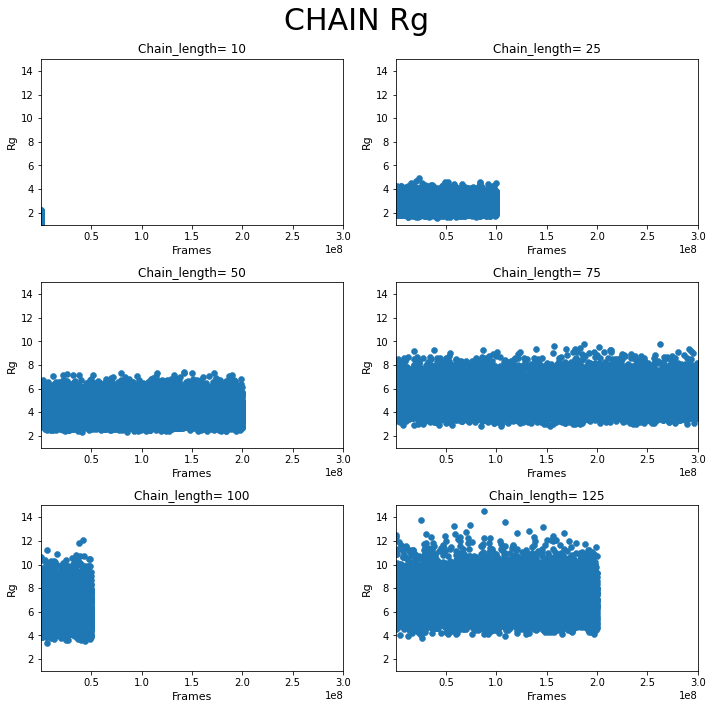

In [94]:
fig,axs = plt.subplots(nrows=3,ncols=2,figsize=(10,10))
counter=0
states=chain_rg_ree.chain_length.unique()
for x_dim in range(1,axs.shape[0]+1):
    for y_dim in range(1,axs.shape[1]+1):
        if counter<len(states):
            axs[x_dim-1,y_dim-1].scatter(chain_rg_ree[chain_rg_ree.chain_length==states[counter]].frames.values,
                                         (chain_rg_ree[chain_rg_ree.chain_length==states[counter]].Rg2.values)**0.5,
                                      linewidth=0.5)
            axs[x_dim-1,y_dim-1].set_title('Chain_length= '+str(states[counter]),fontsize=12)
            axs[x_dim-1,y_dim-1].set_ylabel('Rg',fontsize=11)
            axs[x_dim-1,y_dim-1].set_xlabel('Frames',fontsize=11)
            axs[x_dim-1,y_dim-1].set_xlim(int(chain_rg_ree.frames.values.min()),int(chain_rg_ree.frames.values.max()))
            axs[x_dim-1,y_dim-1].set_ylim(int(chain_rg_ree.Rg2.values.min()**0.5),int(chain_rg_ree.Rg2.values.max()**0.5))
        counter+=1
fig.suptitle('CHAIN Rg',fontsize=30)
plt.tight_layout()


CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 7.39 µs


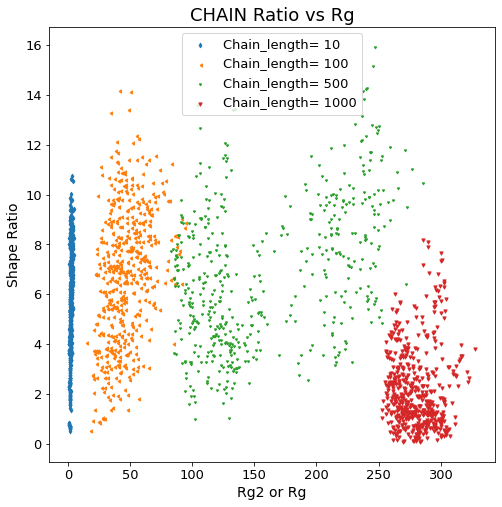

In [21]:
#IGNORE
%time
%matplotlib inline
plt.rcParams["font.weight"] = "regular"
plt.rcParams["axes.labelweight"] = "regular"
fig,ax = plt.subplots(figsize=(8,8))
temp_chain= chain_rg_ree.copy()
scatter_markers=['d',4,'1','v']
j=0
for chain_length in temp_chain.chain_length.unique():
    ax.scatter(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rg2.values,
               chain_rg_ree[chain_rg_ree.chain_length==chain_length].ratio.values,
               marker=scatter_markers[j],s=10,alpha=1,
                                      label='Chain_length= '+str(chain_length))
    j+=1
ax.set_xlabel('Rg2 or Rg',fontsize=14)
ax.set_ylabel('Shape Ratio',fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=13)
plt.setp(ax.get_xticklabels(), fontsize=13)
ax.legend(fontsize=13)
ax.set_title('CHAIN Ratio vs Rg',fontsize=18) #Ratio vs Rg
del temp_chain